## Deep Learning with Python - Francois Chollet

### Chapter 2. Before we begin: the mathematical building blocks of neural networks

This chapter covers:
- A first example of a neural network
- Tensors and tensor operations
- How neural networks learn via backpropagation and gradient descent

Load MNIST database and see its content.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
print(f"Train images: {train_images.dtype} {train_images.shape}. (Min, Max) = ({train_images.min()}, {train_images.max()})")
print(f"Train labels: {train_labels.dtype} {train_labels.shape}. Classes = {set(train_labels)}")

Train images: uint8 (60000, 28, 28). (Min, Max) = (0, 255)
Train labels: uint8 (60000,). Classes = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


The network architecture:
- 1 hidden layer (dense) with 512 neurons and ReLU activation function.
- 1 output layer (dense) with 10 neurons (one for each class) and Softmax activation function.

Note: A dense layer is also called fully connected.

In [9]:
from keras import models
from keras import layers

# Book bug:
# book command: $ network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# Error: Use Input layer instead of Dense layer for input layer
# Solution: $ network.add(layers.Input(shape=(28 * 28,))) 

network = models.Sequential()
network.add(layers.Input(shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

To make the network ready for training, we need to pick three more things, as part of the compilation step:
- *A loss function*: How the netowork will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- *An optimizer*: The mechanism through which the network will update itself based on the data it sees and its loss function.
- *Metrics to monitor during training and testing*: Here, we will only care about accuracy (the fraction of the images that were correctly classified)

In [10]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Preparing the image data and the labels

In [11]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# It's like the hot ecoding in pytorch
# 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train the model. Show the accuracy and the loss over the training data.

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.4411
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1169
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0734
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0369


Check the model performance over the test set.

The tets-set accuracy turns out to be 97.8%, that's quite bit lower than the training set accuracy.
This gap between training accuracy and test accuracy is an example of *overfitting*, the fact that machine-learning 
models tend to perform worse on new data than on their training data.

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f"Test accuracy: {100*test_acc:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9756 - loss: 0.0754
Test accuracy: 97.84%


#### Data representation for neural networks

##### Scalars (0D tensors)

In [21]:
import numpy as np

x = np.array(12)
print(f"x array = {x} with dimension {x.ndim}")

x array = 12 with dimension 0


##### Vectors (1D tensors)

In [22]:
x = np.array([12, 3, 6, 14])
print(f"x array = {x} with dimension {x.ndim}")

x array = [12  3  6 14] with dimension 1


##### Matrices (2D tensors)

In [23]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(f"x array = {x} with dimension {x.ndim}")

x array = [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] with dimension 2


##### 3D tensors and higher-dimensional tensors

If you pack such matrices in a new array, you obtain a 3D tensor, wich you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [24]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(f"x array with dimension {x.ndim}")

x array with dimension 3


##### Key attributes

- *Number of axes (*rank*): For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor's `ndim` in Python libraries such as Numpy.
- *Shape*: This is a tuple of integers that describes how many dimensions the tensors has along each axis. For instance, the previous matrix example has shape `(3, 5)`, and the 3D tensor example has shape `(3, 3, 5)`. A vector has a shape with a single element, such as `(5,)`, whereas a scalar has an empty shape, `()`.
- *Data type* (usually called `dtype` in Python libraries). This is the type of the data contained in the tensor; for instance, a tensor's type could be `float32`, `uint8`, `float64`, and son on.

In [25]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
print(f"Train images dimension:\t{train_images.ndim}")
print(f"Train images shape:\t{train_images.shape}")
print(f"Train images dtype:\t{train_images.dtype}")

Train images dimension:	3
Train images shape:	(60000, 28, 28)
Train images dtype:	uint8


##### Displaying the fourth digit

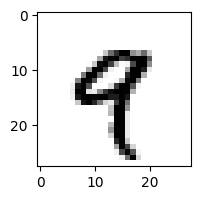

In [28]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.figure(figsize=(2, 2))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
# Slicing
my_slice = train_images[10:100]
print(f"Slice shape: {my_slice.shape}")

# Equivalent to the above
my_slice = train_images[10:100, :, :]
print(f"Slice shape: {my_slice.shape}")

# Equivalent to the above
my_slice = train_images[10:100, 0:28, 0:28]
print(f"Slice shape: {my_slice.shape}")

Slice shape: (90, 28, 28)
Slice shape: (90, 28, 28)
Slice shape: (90, 28, 28)


Slice shape: (60000, 14, 14)


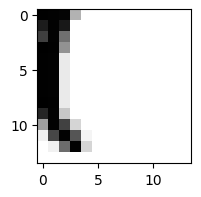

Slice shape: (60000, 14, 14)


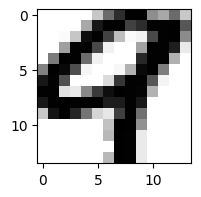

In [33]:
# Select 14x14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
print(f"Slice shape: {my_slice.shape}")
digit = my_slice[4]
plt.figure(figsize=(2, 2))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Select 14x14 pixels in the middle of all images
my_slice = train_images[:, 7:-7, 7:-7]
print(f"Slice shape: {my_slice.shape}")
digit = my_slice[4]
plt.figure(figsize=(2, 2))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##### The notion of data batches
In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you will come across in deep learning will be the *sample axis* (sometimes called the *sample dimension*). In the MNIST example, samples are images of digits.

In addition, deep learning models don't process an entire dataset at once; rather, they break the data into small batches. Concretely, here's one batch of our MNIST digits, with batch size of 128.

When considering such a batch tensor, the first axis (axis 0) is called the *batch axis* or *batch dimension*. This is a term you will frequently encounter when using Keras and other deep learning libraries.

In [ ]:
batch = train_images[:128]      # 1st batch
batch = train_images[128:256]   # 2nd batch

n = 3
batch = train_images[128 * n:128 * (n + 1)]   # nth batch

##### Real world examples of data tensors.
- *Vector data*: 2D tensors of shape (`samples`, `features`)
- *Timeseries data or sequence data*: 3D tensors of shape (`samples`, `timesteps`,`features`). Te time axis is always the second axis (axis of index 1).
- *Images*: 4D tensors of shape (`samples`, `height`, `width`, `channels`) or (`samples`, `channels`, `height`, `width`)

##### Broadcasting
What happens with addition when the shapes of the two tensors being added differ?
When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:
- Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape `(a,b,... n,n+1,... m)` and the other has shape `(n,n+1,... m)`. The broadcasting will then automatically happen for axes a through `n - 1`.
The following example applies the element-wise maximum operation to two tensors of different shapes via broadcasting:

In [2]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

##### A geometric interpretation of deep learning
You just learned that neural networks consist entirely of chains of tensor operations and that all of these tensor operations are just geometric transformations of the input data. It follows that you can interpret a neural network as a very complex geometric transfor- mation in a high-dimensional space, implemented via a long series of simple steps.
In 3D, the following mental image may prove useful. Imagine two sheets of colored paper: one red and one blue. Put one on top of the other. Now crumple them together into a small ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network (or any other machine-learning model) is meant to do is figure out a transformation of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again. With deep learning, this would be implemented as a series of simple transfor- mations of the 3D space, such as those you could apply on the paper ball with your fin- gers, one movement at a time.

Uncrumpling paper balls is what machine learning is about: finding neat representa- tions for complex, highly folded data manifolds. At this point, you should have a pretty good intuition as to why deep learning excels at this: it takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball. Each layer in a deep network applies a transformation that disentangles the data a little—and a deep stack of layers makes tractable an extremely complicated disentanglement process.

Before we describre the differents optimization algorithms, I would like to make clear a main concept that it will be repeated as a loop, and is the most important step in neural networks training process. This import step is called *update the parameters*. First, training data is feed to the neural network, so the prediction for each sample is computed (feedforward process). Next, the cost function is computed for all the predictions. Then, the partial derivatives of the cost function with respect to the parameters are computed. Finally, the parameters are updated by the following general expression:
\begin{equation*}
w_i^{k+1} = w_i^k - \eta \dfrac{\partial{C}}{\partial{w_i}}\, \quad \eta: \text{learning rate} \quad
\end{equation*}
The optimization process consist in update the network's parameters and reach the global minimum of the cost function. The way to get it, it depends on how to update the parameters. For example, computing the partial derivatives with all the samples at the same time, it costs much resources than using a single sample. On the other hand, this way is the slowlest way to update the parameters. Let's define the first three most known algorithms:
- Gradient descent (GD): The step *update the parameters* (feedforward + backpropagation) is performed for the whole dataset at once, so $w_i^{k+1} = w_i^k - \eta\bigg(\frac{1}{N}\sum_{j=1}^{N} \dfrac{\partial{C^j}}{\partial{w_i}}\bigg)$, where $N$ is the number of samples in the dataset.
- Stochastic gradient descent (SGD):
- Mini-batch stochastic gradient descent (Mini_batch SGD): 